# CLASSIFICATION OF FACIAL EMOTION USING CNN
# Anu Kumaravelan 
# 300316960

### REF:
(Textual and concepts)

- https://medium.com/analytics-vidhya/facial-expression-detection-using-machine-learning-in-python-c6a188ac765f
- https://towardsdatascience.com/the-ultimate-guide-to-emotion-recognition-from-facial-expressions-using-python-64e58d4324ff
- https://medium.com/analytics-vidhya/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5
- https://keras.io/api/layers/pooling_layers/max_pooling2d/

(Code )

- https://www.analyticsvidhya.com/blog/2021/11/facial-emotion-detection-using-cnn/

- https://www.coursera.org/projects/facial-expression-classification
### Dataset:
https://research.google/tools/datasets/google-facial-expression/

### About the dataset 

The dataset was collected from google dataset website for facial expression training and predictions. This dataset is a simple dataset where the images are converted into number format, and stored in a csv file. The photos are converted into pixels and saved in a column named '`Pixel`' along with the emotions which represents the photo's representation

The main idea of this project is to build a model to perform the recognition of `Facial expression` of any given face with the dataset obtained. The Machine Learning technique we are going to employ for this project is $Convolution$ $Neural$ $Network$. CNN is a deep learning process to employ for images. 

We use packages like keras, tensorflow, PIL, os, and cv2, on top of seaborn, pandas, matplotlib and numpy

In [1]:
# !pip install opencv-python

## Importing the necessary Libraries

In [2]:
#  basic libraries for the computations and loading the datasets 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# cv2 for image reading
import cv2
import PIL # python image library

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.python.keras import *
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from sklearn.metrics import confusion_matrix

from tensorflow.keras import backend as K
from sklearn.metrics import classification_report



### Loading the dataset 

In [3]:
df = pd.read_csv('Dataset/emotion.csv')

In [4]:
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3,2,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...


- The dataset consists of two columns one is feature: ` pixels` and target : `emotion`.
- `pixel` is the converted number format of the photos and emotion is numbered and is a categorical columns
    - 0: angry
    - 1: disgust
    - 2: sad
    - 3: happy
    - 4: surprised

### DATA PREPARATION  

- Let us take a look at the dataset and do some exploration to understand the dataset

In [5]:
df.shape

(24568, 2)

In [6]:
# describes the information about the rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24568 entries, 0 to 24567
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  24568 non-null  int64 
 1    pixels  24568 non-null  object
dtypes: int64(1), object(1)
memory usage: 384.0+ KB


- As we can see that the dataset is clean and with no null values, we can starrt our transformation, EDA and feature engineering 
- `emotion` is int64 data type
- `pixels` is an object data type

we see that pixels column name is not really a proper way to name it so we are gonna change those 

In [7]:
df.describe()

,emotion
count,24568.000000
mean,2.266200
std,1.332423
min,0.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,4.000000


As we already mentioned, even though emotion is in int data type it is a categorical feild, meaning summary statistics doesn't really make any sense, but still this is helpful to make sure there are not values beyond the range. 

In [8]:
df.corr()

,emotion
emotion,1.0


- The reason that the correlation table is just by itself is that our pixels column is still as an object type.
- Let us chnage the column name, also we change the pixels into an array format to plot the images later 

In [9]:
# changing the column name
df.rename(columns={' pixels': 'pixels'},inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24568 entries, 0 to 24567
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  24568 non-null  int64 
 1   pixels   24568 non-null  object
dtypes: int64(1), object(1)
memory usage: 384.0+ KB


In [11]:
# let us try to obtain the value of the particular column and rows to see what is present
# emotion row5
print('value at fifth row of emotion column is: ',df.emotion[5])

#  pixels row10 
print('value at tenth row of pixels column is: ',df.pixels[5])

value at fifth row of emotion column is:  3
value at tenth row of pixels column is:  85 84 90 121 101 102 133 153 153 169 177 189 195 199 205 207 209 216 221 225 221 220 218 222 223 217 220 217 211 196 188 173 170 133 117 131 121 88 73 73 50 27 34 32 34 40 46 63 78 76 101 131 116 117 149 158 166 177 187 195 200 203 209 211 215 222 227 227 228 230 234 235 231 226 227 223 219 212 212 200 185 170 135 111 109 108 76 54 68 64 32 32 35 36 44 52 76 96 115 134 117 125 147 164 175 184 194 201 207 209 212 217 222 226 230 233 236 240 243 243 242 238 232 227 224 218 218 215 214 203 189 153 126 106 94 77 58 60 74 43 30 34 42 43 91 99 104 132 110 121 156 172 179 189 199 206 212 215 217 222 228 232 238 241 243 243 244 245 244 242 236 228 227 220 218 213 209 211 208 195 174 146 113 94 87 59 54 78 52 32 39 48 86 83 113 122 100 112 162 176 182 192 205 213 215 217 222 220 225 238 240 245 246 245 246 246 247 245 241 233 228 222 219 217 212 208 204 204 199 175 146 103 86 75 47 43 76 57 37 45 86 88 115 117 

The above `pixels` column is saved as a string separated by ` ` (space) so we are going to trim it at the same time save it into an array of shape *48x48* as that is our photo format

In [12]:
# let us define a function so that we can use it for later 

def convert_to_array(x):
    y = np.array(x.split(' ')).reshape(48,48,1).astype('float32')
    return y

In [13]:
#  let us use a lambda function 
df['pixels'] = df['pixels'].apply(lambda x: convert_to_array(x))

In [14]:
df['pixels'][5]

array([[[ 85.],
        [ 84.],
        [ 90.],
        ...,
        [ 40.],
        [ 46.],
        [ 63.]],

       [[ 78.],
        [ 76.],
        [101.],
        ...,
        [ 36.],
        [ 44.],
        [ 52.]],

       [[ 76.],
        [ 96.],
        [115.],
        ...,
        [ 34.],
        [ 42.],
        [ 43.]],

       ...,

       [[102.],
        [100.],
        [ 97.],
        ...,
        [ 65.],
        [ 76.],
        [ 62.]],

       [[107.],
        [101.],
        [ 96.],
        ...,
        [ 57.],
        [ 79.],
        [ 70.]],

       [[106.],
        [103.],
        [ 94.],
        ...,
        [ 58.],
        [ 73.],
        [ 84.]]], dtype=float32)

As we can see the string is converted into an array now. we can try to plot the images. but let us also make sure that the rows has non null values

In [15]:
df.isnull().sum()

emotion    0
pixels     0
dtype: int64

### Saving the cleaned dataset

In [16]:
# saving the cleaned and new dataset into a new csv file
df.to_csv('Dataset/project_cleaned.csv')

## Data Visualizations 

Let us see that have some visualizations

Total number of images for each emotion


<AxesSubplot:>

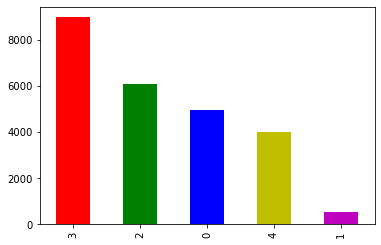

In [17]:
#  count plot to help visualize how many photos are there for each dataset
print('Total number of images for each emotion')
df.emotion.value_counts().plot(kind='bar', color=list('rgbym'))

we see that the photos corresponding to '`happy`' is the highest and '`disgust`' is the leaast.

so let us proceed witht he dataset. 
- we saw that the emotion column is just with numbers and if we try to plot the images all of them will display just numbers 0 to 4, so we will assign them the proper emotion thus we can see wjat the image is assigned as 

### Plotting an Image 

to plot the image we use `imshow` inbuiolt class from matplotlib.pyplot

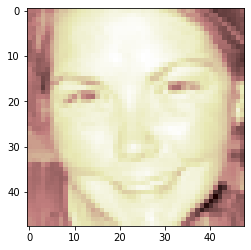

In [18]:
plt.imshow(df['pixels'][5], cmap = 'pink') # we use a pink scale to view the image

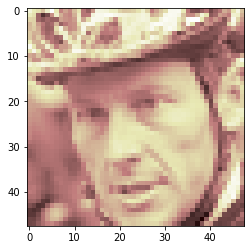

In [19]:
plt.imshow(df['pixels'][10], cmap = 'pink') # we use a pink scale to view the image

In [20]:
# assigning proper labels for each of them 
emotion_for_label={0: 'angry', 1:'disgust', 2: 'sad', 3:'happy', 4: 'surprised'}

we will find the first imaage that corrssponds to each of our emotion

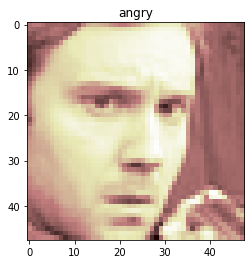

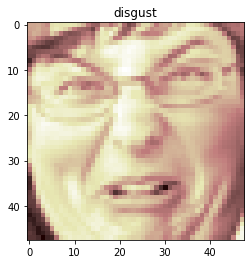

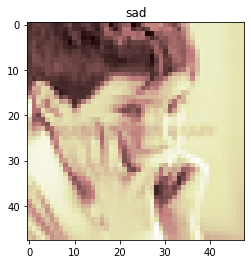

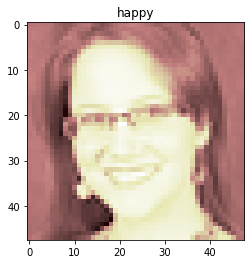

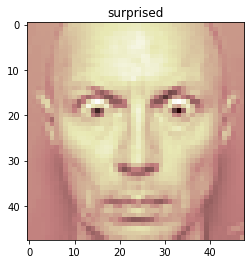

In [21]:
for i in range(5):
  a = df[df['emotion'] == i][:1] # finds the photo that corresponds to numbers from 0 to 4
  y = a['pixels'].item()
  y = y.reshape(48,48) # reshapes as they are in the array format are needed 
  plt.figure()
  plt.title(emotion_for_label[i]) #assigns the label fromt he list
  plt.imshow(y, cmap= 'pink') # plots the image

### Let us split the dataset into features and target

- Since the our dataset requires classification, we are going to create dummies for emotion columns and save as a target
- We are also going to drop the first dummy column and add a prefix as `'emotion'`

In [22]:
features = df['pixels']
target = pd.get_dummies(df['emotion'],prefix='emotion')

In [23]:
features.shape

(24568,)

- we see that the `'features'` is now into a single array, so we will reshape it to 48*48 array for plot it as an image

In [24]:
# reshaping the features to 48*48
features=np.stack(features, axis=0)
features = features.reshape(24568,48,48,1)

In [25]:
features.shape

(24568, 48, 48, 1)

In [26]:
features[0]

array([[[ 70.],
        [ 80.],
        [ 82.],
        ...,
        [ 52.],
        [ 43.],
        [ 41.]],

       [[ 65.],
        [ 61.],
        [ 58.],
        ...,
        [ 56.],
        [ 52.],
        [ 44.]],

       [[ 50.],
        [ 43.],
        [ 54.],
        ...,
        [ 49.],
        [ 56.],
        [ 47.]],

       ...,

       [[ 91.],
        [ 65.],
        [ 42.],
        ...,
        [ 72.],
        [ 56.],
        [ 43.]],

       [[ 77.],
        [ 82.],
        [ 79.],
        ...,
        [105.],
        [ 70.],
        [ 46.]],

       [[ 77.],
        [ 72.],
        [ 84.],
        ...,
        [106.],
        [109.],
        [ 82.]]], dtype=float32)

In [27]:
target.shape

(24568, 5)

## Split and train the dataset

- before we split the dataset we will change it to array format

In [28]:
features= np.array(features)
target= np.array(target)

In [29]:
#  split it into test train and validation 
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.1,shuffle=True)
xval, xtest, yval, ytest = train_test_split(xtest, ytest, test_size=0.5,shuffle=True)

In [30]:
xval.shape, yval.shape

((1228, 48, 48, 1), (1228, 5))

In [31]:
print(xtest.shape, ytest.shape)
print(xtrain.shape, ytrain.shape)

(1229, 48, 48, 1) (1229, 5)
(22111, 48, 48, 1) (22111, 5)


- KEras `ImageDataGenerator` helps us augment the images when the training is still going on. any random transformation can be applied on each of the images.
- Helps us save the overhead Memory while also making it robust

https://keras.io/api/preprocessing/image/

In [32]:
# preprocessing of the images

xtrain = xtrain/255
xval = xval/255
xtest= xtest/255

In [33]:
train_datagen = ImageDataGenerator(
rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode = "nearest"
)

## Building a Facial Classification model using convolutional block

We are gonna be using the following classes from Keras
- `Conv2D` : it is used for achieving high accurace for image recognition tasks.
- `MaxPool2D` : it is used for a 2D spatial data. it downsamples(compressing) the input along the spatial dimentions by using the maximum value of each channel of the input.
- `BatchNormalization` is the layer that normalizes the inputs. applies a transofrmation to maintain the mean output close to 0 and std dev close to 1
- `Activation('relu')` : Rectified Linear Unit Activation function has  default values n returns max(x,0)


Ref: https://keras.io/

In [1]:
# let us define a function for later use

def residual_block(features, filter, s):
    copy = features
    # convolution block
    fil1,fil2,fil3 = filter
    
     # main 
#     #filter #1
    features=Conv2D(fil1,(1,1), strides =(1,1), name='residual_'+str(s)+'_con_a',kernel_initializer= glorot_uniform(seed = 0))(features)
    features = MaxPool2D((2,2))(features)
    features= BatchNormalization(axis=3, name='bat_norm_'+str(s)+'_con_a')(features)
    features=Activation('relu')(features)
    
#     #filter #2
    features = Conv2D(fil2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='residual_'+str(s)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(features)
    features= BatchNormalization(axis=3, name='bat_norm_'+str(s)+'_con_b')(features)
    features=Activation('relu')(features)
    
#     filter #3
    features=Conv2D(fil3,kernel_size=(1,1), strides =(1,1), name='residual_'+str(s)+'_con_c',kernel_initializer= glorot_uniform(seed = 0))(features)
    features= BatchNormalization(axis=3, name='bat_norm_'+str(s)+'_con_c')(features)
    

    
    # Short path
    copy = Conv2D(fil3, kernel_size = (1,1), strides =(1,1),name ='residual_'+str(s)+'_con_copy', kernel_initializer= glorot_uniform(seed = 0))(copy)
    copy = MaxPool2D((2,2))(copy)
    copy = BatchNormalization(axis =3, name = 'bat_norm_'+str(s)+'_con_copy')(copy)

    # Adding the above lauers
    features = Add()([features, copy])
    features = Activation('relu')(features)

    # Block 1
    copy = features


    # Main Path
    # filter 1
    features = Conv2D(fil1, (1,1),strides = (1,1), name ='residual_'+str(s)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(features)
    features = BatchNormalization(axis =3, name = 'bat_norm_'+str(s)+'_identity_1_a')(features)
    features = Activation('relu')(features) 

    # filter 2
    features = Conv2D(fil2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='residual_'+str(s)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(features)
    features = BatchNormalization(axis =3, name = 'bat_norm_'+str(s)+'_identity_1_b')(features)
    features = Activation('relu')(features) 
    
    #filter 3
    features = Conv2D(fil3, kernel_size = (1,1), strides =(1,1),name ='residual_'+str(s)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(features)
    features = BatchNormalization(axis =3, name = 'bat_norm_'+str(s)+'_identity_1_c')(features)

    # ADD
    features = Add()([features,copy])
    features = Activation('relu')(features)

  # Identity Block 2
    copy = features


      # Main Path
    features = Conv2D(fil1, (1,1),strides = (1,1), name ='residual_'+str(s)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(features)
    features = BatchNormalization(axis =3, name = 'bat_norm_'+str(s)+'_identity_2_a')(features)
    features = Activation('relu')(features) 

    features = Conv2D(fil2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='residual_'+str(s)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(features)
    features = BatchNormalization(axis =3, name = 'bat_norm_'+str(s)+'_identity_2_b')(features)
    features = Activation('relu')(features)

    features = Conv2D(fil3, kernel_size = (1,1), strides =(1,1),name ='residual_'+str(s)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(features)
    features = BatchNormalization(axis =3, name = 'bat_norm_'+str(s)+'_identity_2_c')(features)

  # ADD
    features = Add()([features,copy])
    features = Activation('relu')(features)

    return features
    
    
    

Now, we are going to create a padding and a few more stages that creates a residual block using our function we defined above

- `ZeroPAdding2d` for 2D input(images) adds rows of zeros to the top, bottom, right and left of the tensor

- `AveragePooling2D` this also helps in downsampling the input to spatial dimensions but uses the average of the input channel.

In [35]:
# our input shape is fixed 
in_shape=(48,48,1)

# defining the tensor shape
x_input = Input(in_shape)

# zero padding
features = ZeroPadding2D((3, 3))(x_input)

# first stage
features = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(features)
features = BatchNormalization(axis =3, name = 'bn_conv1')(features)
features = Activation('relu')(features)
features = MaxPooling2D((3, 3), strides= (2, 2))(features)


# sencond
features = residual_block(features, filter= [64, 64, 256], s= 2)

# third
features = residual_block(features, filter= [128, 128, 512], s= 3)

# Pooling Average
features = AveragePooling2D((2, 2), name = 'Averagea_Pooling')(features)

# final layer
features = Flatten()(features)
features = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(features)

emotion_model = Model(inputs=x_input, outputs= features, name='Resnet18')
emotion_model.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 54, 54, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 24, 24, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 24, 24, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

## Training the convolution Neural Network

- `compile(optimzer: Adam)` implements the Adam Algorithm, which is stochastic gradient descent method, an adaptive esstimation to train deep learning models

In [36]:
#  we use Adam optimer
emotion_model.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

- `Earlystopping` is a method to stop the training once the metric stops works
- `ModelCheckpoint` callback to save the keras model and model weights at some frequesncy 

In [37]:
# using early stop for 
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

# save the best model with lower loss/ we can use it for later
checkpointer = ModelCheckpoint(filepath = "FacialExpression_weights.hdf5", verbose = 1, save_best_only=True)

In [38]:
h = emotion_model.fit(train_datagen.flow(xtrain, ytrain, batch_size=64),
	validation_data=(xval, yval), steps_per_epoch=len(xtrain) // 64,
	epochs= 20, callbacks=[checkpointer, early_stop])

Epoch 1/20
345/345 [==============================] - 61s 169ms/step - loss: 1.4342 - accuracy: 0.4211 - val_loss: 1.6417 - val_accuracy: 0.3762

Epoch 00001: val_loss improved from inf to 1.64174, saving model to FacialExpression_weights.hdf5


C:\Users\kumar\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/20
345/345 [==============================] - 56s 161ms/step - loss: 1.1554 - accuracy: 0.5288 - val_loss: 1.4188 - val_accuracy: 0.3673

Epoch 00002: val_loss improved from 1.64174 to 1.41876, saving model to FacialExpression_weights.hdf5
Epoch 3/20
345/345 [==============================] - 57s 165ms/step - loss: 1.0406 - accuracy: 0.5810 - val_loss: 1.5322 - val_accuracy: 0.4585

Epoch 00003: val_loss did not improve from 1.41876
Epoch 4/20
345/345 [==============================] - 57s 165ms/step - loss: 0.9678 - accuracy: 0.6141 - val_loss: 1.4886 - val_accuracy: 0.4748

Epoch 00004: val_loss did not improve from 1.41876
Epoch 5/20
345/345 [==============================] - 62s 178ms/step - loss: 0.9041 - accuracy: 0.6430 - val_loss: 0.9472 - val_accuracy: 0.6116

Epoch 00005: val_loss improved from 1.41876 to 0.94719, saving model to FacialExpression_weights.hdf5
Epoch 6/20
345/345 [==============================] - 64s 186ms/step - loss: 0.8605 - accuracy: 0.6601 - val_l

### Let us save the model architecture to json file for later use

we will write it into a json file

In [39]:
json_model = emotion_model.to_json()

with open ('Emotion_model.json', 'w') as json_file: 
    json_file.write(json_model)

## Performance of the trained facial expression Classifier Model

we can start to read from the json file 

In [40]:
with open('Emotion_model.json', 'r') as json_file:
    json_save = json_file.read()
    
# lets load the architechture into the df
emotion_model = tf.keras.models.model_from_json(json_save) #reading fromt hte json file
emotion_model.load_weights('FacialExpression_weights.hdf5') # the hdf5 file we saved earlier is being access
emotion_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics='accuracy') #we use the save Adam algortih to optimize

### Let us evaluate the model using the test data

In [41]:
score= emotion_model.evaluate(xtest,ytest)
print('Accuracy of our test : ',score[1]) # we have score[1] as they the accuracy of ytest is stored at pos=1 

39/39 [==============================] - 1s 21ms/step - loss: 0.7297 - accuracy: 0.7177
Accuracy of our test :  0.7176566123962402


#### We see that the accuracy of the test is 

`h` is where our model was fit using the train and `train_datagen` was used to transformed. and let us take a look at the *'Key'*

In [42]:
h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

these are the dictoionary keys for our history stored. let us store these values into appropriate variables

In [43]:
loss = h.history['loss']
accuracy = h.history['accuracy']
val_loss=h.history['val_loss']
val_accuracy=h.history['val_accuracy']

## Visualization 

Let us plot the accuracy of the training and validation as a plot to compare 


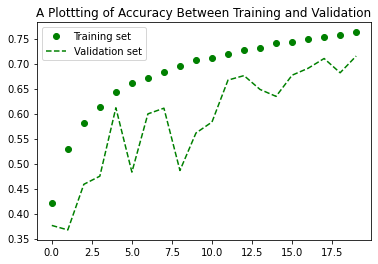

In [44]:
e = range(len(accuracy))

plt.plot(e, accuracy, 'go', label='Training set')
plt.plot(e, val_accuracy, 'g--', label='Validation set')

plt.title('A Plottting of Accuracy Between Training and Validation' )
plt.legend()

 Let us plot the loss of the training and validation set

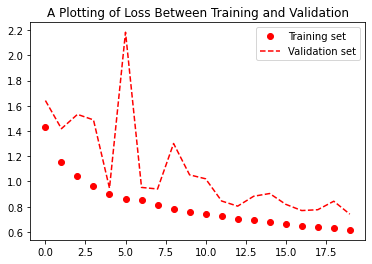

In [45]:
plt.plot(e, loss, 'ro', label='Training set')
plt.plot(e, val_loss, 'r--', label='Validation set')

plt.title('A Plotting of Loss Between Training and Validation' )
plt.legend()

## Predictions 

- Using the features test dataframe, we can predict the value and save it as predicted value.
- We are also going to transform the predicted value using argmax so that it returns the max value from each axis and using-1 we begin from the end

In [46]:
predicted_value = emotion_model.predict(xtest)
predicted_value = np.argmax(predicted_value, axis = -1) # returns the maximum value of the given axis and begins from the back

In [47]:
ytrue = np.argmax(ytest, axis=-1)

### Confusion Matrix

Let us also create a confusion matrix for the true and predicted value 

<AxesSubplot:>

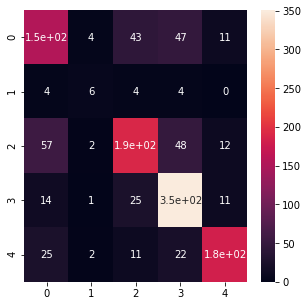

In [48]:
conf_matrix = confusion_matrix(ytrue, predicted_value)
plt.figure(figsize = (5, 5))
sns.heatmap(conf_matrix, annot = True, cbar = True)

Let us plot our images along with that let us also get the predicted and the real value and compare for teh individual

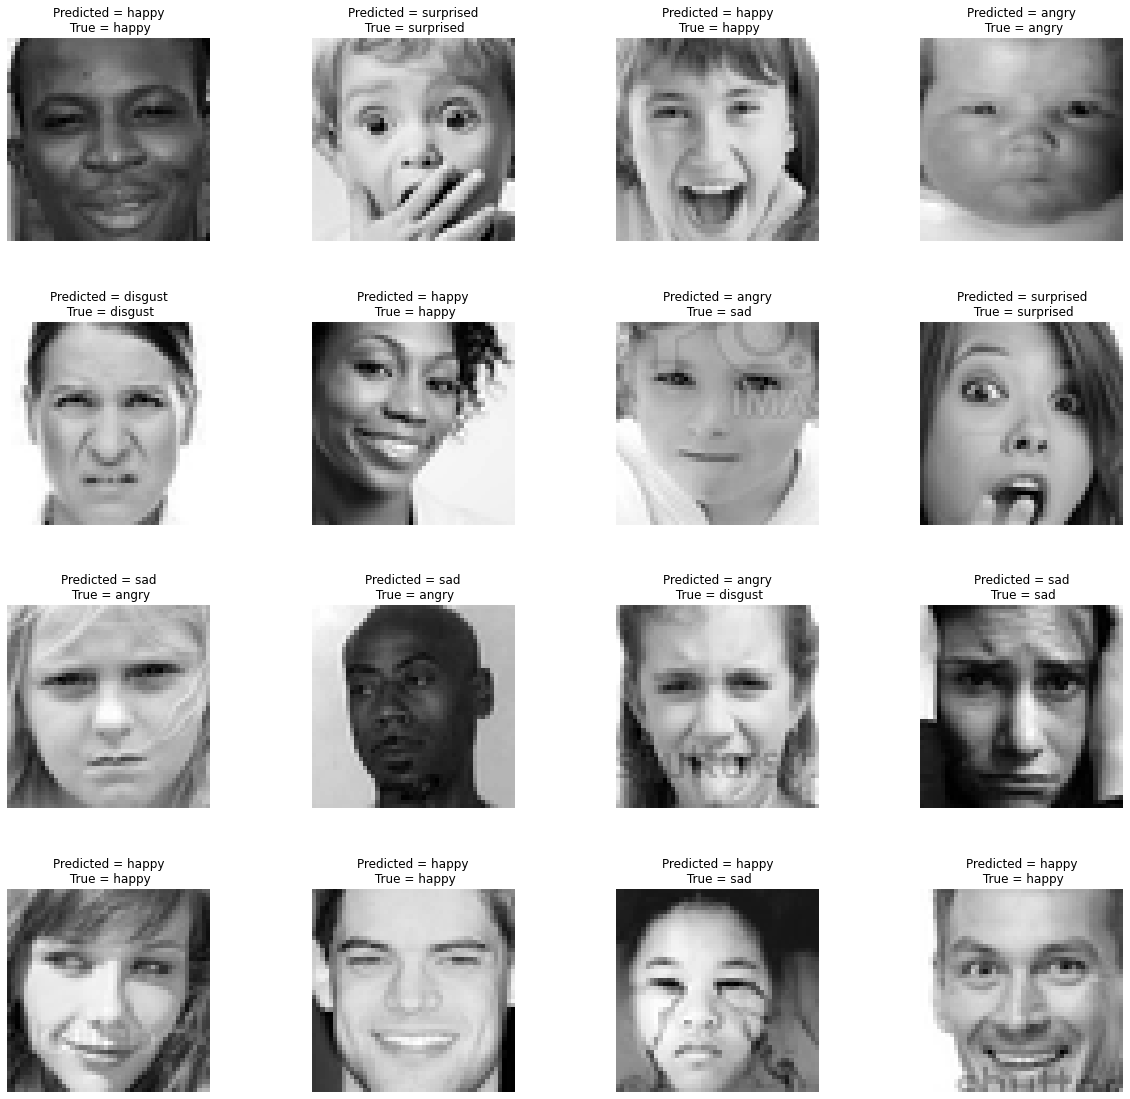

In [49]:
leng = 4
width = 4

fig, axes = plt.subplots(leng, width, figsize = (20, 20))
axes = axes.ravel()

for i in np.arange(0, leng*width):
    axes[i].imshow(xtest[i].reshape(48,48), cmap = 'gray')
    axes[i].set_title('Predicted = {}\n True = {}'.format(emotion_for_label[predicted_value[i]], emotion_for_label[ytrue[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5)   

PRedicted: is the predicated value we obtained from teh model
true is t

## Classification Report 

In [50]:
print(classification_report(ytrue, predicted_value))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60       259
           1       0.40      0.33      0.36        18
           2       0.70      0.61      0.65       309
           3       0.74      0.87      0.80       402
           4       0.84      0.75      0.79       241

    accuracy                           0.72      1229
   macro avg       0.66      0.63      0.64      1229
weighted avg       0.72      0.72      0.71      1229



https://towardsdatascience.com/convert-photo-into-pixel-art-using-python-d0b9bd235797


## Out of Sample Prediction

- Usign the final model. we are going to perform the predictions for out of sample data. We take the entire dataset

In [51]:
f=np.array(df['pixels']) #features
t= np.array(pd.get_dummies(df['emotion'],prefix='emotion'))  #target

In [52]:
#  transform the data 
f=np.stack(f, axis=0)
f= f.reshape(24568,48,48,1)

In [53]:
f=f/255
f.shape

(24568, 48, 48, 1)

In [54]:
t.shape

(24568, 5)

In [55]:
# predicting using the final model
oom_pred = emotion_model.predict(f)
# converting using argmax, so that the image can be represented later
oom_pred = np.argmax(oom_pred, axis = -1)

In [56]:
# the real value from the dataset and transformed for representation
oom_true = np.argmax(t, axis=-1)

In [57]:
# the shapes of our predicted and true values
oom_true.shape, oom_pred.shape

((24568,), (24568,))

Plotting the image using a similar way as above

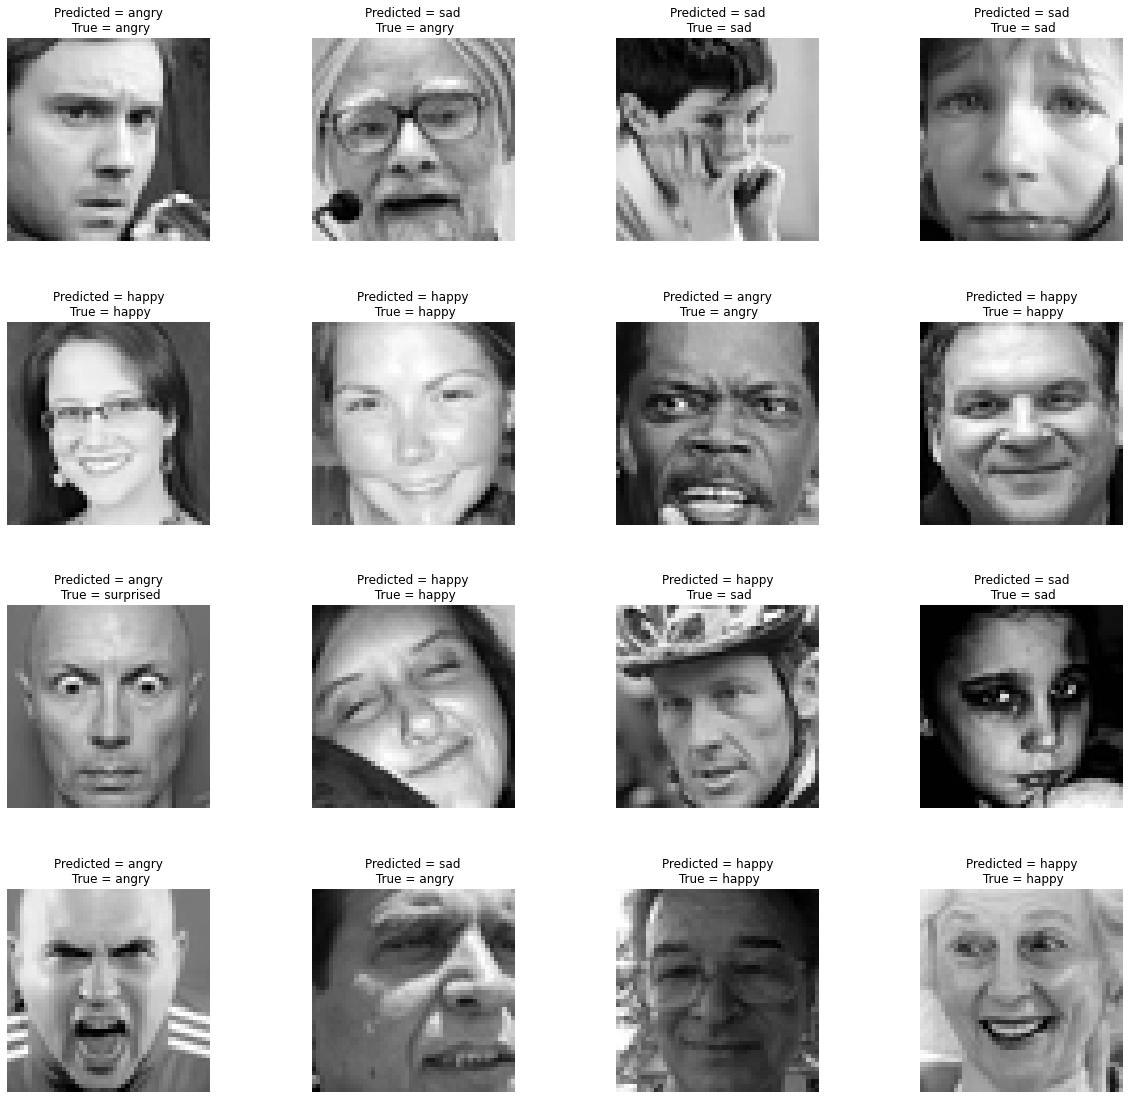

In [58]:
leng = 4
width = 4

fig, axes = plt.subplots(leng, width, figsize = (20, 20))
axes = axes.ravel()

for i in np.arange(0, leng*width):
    axes[i].imshow(f[i].reshape(48,48), cmap = 'gray')
    axes[i].set_title('Predicted = {}\n True = {}'.format(emotion_for_label[oom_pred[i]], emotion_for_label[oom_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5) 

We see that the predictions are nearly accurate but to confirm we shall do a confusion matrix and also a classification report

## Confusion matrix

Confusion matrix for out of sample target and features

<AxesSubplot:>

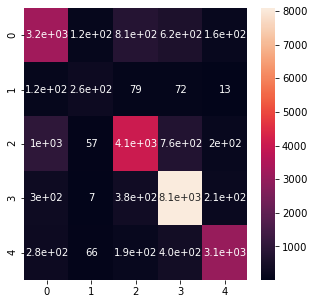

In [59]:
conf_matrix1 = confusion_matrix(oom_true,oom_pred)
plt.figure(figsize = (5, 5))
sns.heatmap(conf_matrix1, annot = True, cbar = True)

## Classification Report 

Classification report for out of sample target and features

In [60]:
print(classification_report(oom_true,oom_pred))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65      4953
           1       0.51      0.48      0.49       547
           2       0.73      0.67      0.70      6077
           3       0.81      0.90      0.85      8989
           4       0.84      0.77      0.80      4002

    accuracy                           0.76     24568
   macro avg       0.71      0.69      0.70     24568
weighted avg       0.76      0.76      0.76     24568



# Result /Remarks:

### The model has pretty good accuracy of 82% overall and precision of 83% average for the out of sample data

### while the test data produces about 79% and 80% accuracy respectively 